In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions_preparing_dataset import set_column_formats, filter_sea_from_full_df
from functions import plot_processed_cdd_data
import cartopy.crs as crs

base_columns=["latitude","longitude","year","month","day"]
event_columns=["Convective_Event","EVENT_CATEGORY"]
model_columns=["totalx_max","cape_max","w_min","p80.162_max","d_min","q_max","cp_max","tciw_max","deg0l_max","sp_mean"]
path_europe_2014_2013="/home/jovyan/data/xwai-convective-day-detector/1d7a6be/PROCESSED/EM/MERGED/merged_EM_2014_2023_dataset.parquet"
formats = {
    'year': 'int16',  
    'month': 'int8',  
    'day': 'int8',
    'Hail_Event':'int8',
    'latitude':'float32',
    'longitude':'float32',
}

In [2]:
### Reading data and adding hail_Event column ###
data_europe=pd.read_parquet(path_europe_2014_2013,columns=base_columns+model_columns+event_columns)
data_europe=data_europe.loc[data_europe.year>2015]
data_europe['Hail_Event'] = data_europe['EVENT_CATEGORY'].apply(lambda x: 1 if x == 9 else 0)

### Removing duplicates ###
print(len(data_europe))
print((data_europe.Hail_Event.sum()))
data_europe = data_europe.groupby(base_columns+model_columns, as_index=False).agg({
    'Hail_Event': 'max'
})
print(len(data_europe))
print((data_europe.Hail_Event.sum()))

### Filtering sea regions
data_europe = filter_sea_from_full_df(data_europe)

36682011
30187
36638280
13961


In [31]:
# Cropping regions
data_central_europe=data_europe.loc[(data_europe.latitude>43) & (data_europe.latitude<52) & (data_europe.longitude>4) & (data_europe.longitude<17)]
data_cataluña=data_europe.loc[(data_europe.latitude>=40.5) & (data_europe.latitude<=43) & (data_europe.longitude>=0) & (data_europe.longitude<=3.5)]
data_france_plain=data_europe.loc[(data_europe.latitude>=43.25) & (data_europe.latitude<=47) & (data_europe.longitude>=-1.25) & (data_europe.longitude<=2.5)]
data_southern_poland=data_europe.loc[(data_europe.latitude>=50.25) & (data_europe.latitude<=52) & (data_europe.longitude>=18) & (data_europe.longitude<=23.5)]

# reducing size
data_central_europe = set_column_formats(data_central_europe, formats)
data_cataluña = set_column_formats(data_cataluña, formats)
data_france_plain = set_column_formats(data_france_plain, formats)
data_southern_poland = set_column_formats(data_southern_poland, formats)

# Saving 
data_central_europe.to_parquet("/home/jovyan/data/koios/transfer_learning/koios_data_central_europe.parquet")
data_cataluña.to_parquet("/home/jovyan/data/koios/transfer_learning/koios_data_catalonia.parquet")
data_france_plain.to_parquet("/home/jovyan/data/koios/transfer_learning/koios_data_france_plain.parquet")
data_southern_poland.to_parquet("/home/jovyan/data/koios/transfer_learning/koios_data_southern_poland.parquet")

/home/jovyan/KOIOS/dev/transfer_learning_europe/functions_preparing_dataset.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(fmt)
/home/jovyan/KOIOS/dev/transfer_learning_europe/functions_preparing_dataset.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(fmt)
/home/jovyan/KOIOS/dev/transfer_learning_europe/functions_preparing_dataset.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

<GeoAxes: >

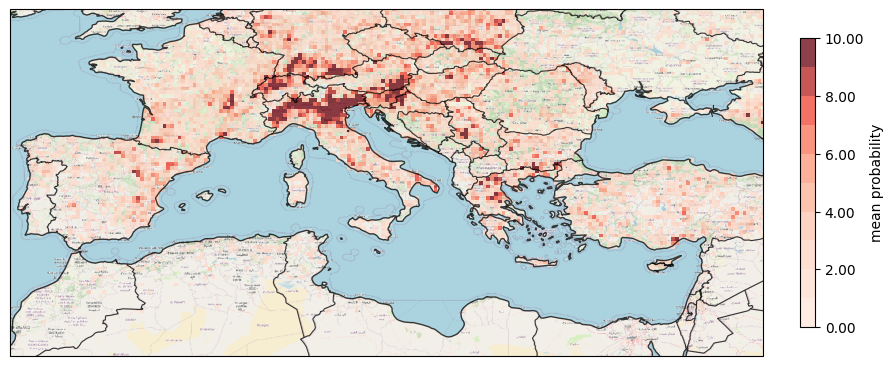

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(111, projection=crs.PlateCarree())
ax=plt.gca()
plt.title('')
events=data_europe.groupby(["latitude","longitude"])["Hail_Event"].sum().reset_index()
plot_processed_cdd_data(ax,events,"Hail_Event",alpha=0.75,vmax=,zoom=6,colorbar_name="mean probability")

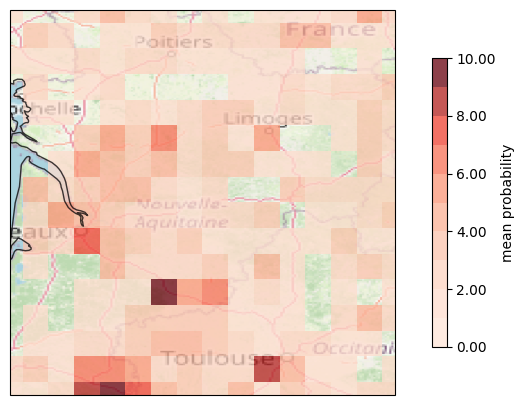

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(111, projection=crs.PlateCarree())
ax=plt.gca()
plt.title('')
plot_processed_cdd_data(ax,events,"Hail_Event",alpha=0.75,vmax=10,zoom=6,colorbar_name="mean probability")
ax.set_extent([-1.25, 2.5, 43.25, 47.0], crs=crs.PlateCarree())

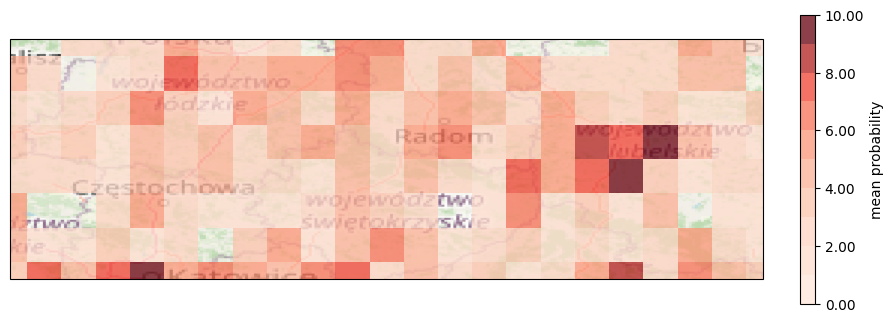

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(111, projection=crs.PlateCarree())
ax=plt.gca()
plt.title('')
plot_processed_cdd_data(ax,events,"Hail_Event",alpha=0.75,vmax=10,zoom=6,colorbar_name="mean probability")
ax.set_extent([18, 23.5, 50.25, 52.0], crs=crs.PlateCarree())

## Statisitcs on European data

In [15]:
print("all events in Europe from 2015: ",data_europe.loc[(data_europe.year>2018)].Hail_Event.sum())
print("all events in Hail Central Europe from 2019: ",data_europe.loc[(data_europe.year>2018) & (data_europe.latitude>37.5) & (data_europe.latitude<50.5) & (data_europe.longitude>-2.5) & (data_europe.longitude<27)].Hail_Event.sum())

all events in Europe from 2015:  10417
all events in Hail Central Europe from 2019:  7911
